# Web Scraping Job Vacancies

## Introduction

In this project, we'll build a web scraper to extract job listings from a popular job search platform. We'll extract job titles, companies, locations, job descriptions, and other relevant information.

Here are the main steps we'll follow in this project:

1. Setup our development environment
2. Understand the basics of web scraping
3. Analyze the website structure of our job search platform
4. Write the Python code to extract job data from our job search platform
5. Save the data to a CSV file
6. Test our web scraper and refine our code as needed

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and HTML structure. In addition, you may want to use the following packages in your Python environment:

- requests
- BeautifulSoup
- csv
- datetime

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install requests`
- `!pip install BeautifulSoup`

## Step 1: Importing Required Libraries

In [77]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
url = 'https://www.tecnoempleo.com/ofertas-trabajo/'

# Realiza la solicitud GET a la URL
response = requests.get(url)

# Verifica si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Parsea el contenido HTML de la página
    soup = BeautifulSoup(response.text, 'html.parser')

    # Encuentra elementos en la página (ajusta según la estructura HTML de la página)
    ofertas = soup.find_all('div', class_='p-2 border-bottom py-3 bg-white')

else:
    print(f'Error al obtener la página. Código de estado: {response.status_code}')


In [74]:
if ofertas:
    # Lista para almacenar diccionarios de ofertas
    lista_ofertas = []

    # Procesa la información de las ofertas y agrega a la lista
    for oferta in ofertas:
        titulo = oferta.find('h3').find('a').text.strip()
        empresa = oferta.find('a', class_='text-primary link-muted').text.strip()
        info = oferta.find('span', class_= 'd-block d-lg-none text-gray-800')
        ciudad = info.find('b').text.strip()
        info = info.text.strip().replace(ciudad,"")
        info=re.sub(r'\s+', ' ', info)

        oferta_dict = {'Título': titulo, 'Empresa': empresa, 'Ciudad': ciudad, 'Info': info}
        lista_ofertas.append(oferta_dict)

    # Convierte la lista de ofertas a un DataFrame
    df_ofertas = pd.DataFrame(lista_ofertas)

In [76]:
df_ofertas

,Título,Empresa,Ciudad,Info
0,Desarrollador/a,NPR Spain,Madrid,(Híbrido) - 14/11/2023 Nueva
1,Implantador/a de ERP,Inology,Barcelona,(Presencial) - 14/11/2023 Actualizada 24.000€...
2,Desarrollador .NET,NPR Spain,Madrid,(Presencial) - 14/11/2023 Actualizada 33.000€...
3,Especialista en reparaciones Iphone/MAC,Macxmenos,Sta. Cruz De Tenerife,(Presencial) y otras - 14/11/2023 Actualizada
4,Business Consultant Analyst,NPR Spain,Barcelona,(Híbrido) - 14/11/2023 Actualizada 36.000€ - ...
5,Site Reliability Engineer (SRE),HubTalent,Madrid,y otras - 14/11/2023 Actualizada 30.000€ - 45...
6,Técnico/a de Campo,Grupo Sermicro,Barcelona,(Presencial) - 14/11/2023 Nueva
7,Programador Senior Cobol/400,arelance,100% remoto,- 14/11/2023 Nueva 27.000€ - 30.000€ b/a
8,Programadores Java APX,arelance,100% remoto,- 14/11/2023 Nueva 27.000€ - 36.000€ b/a
9,JAVA Developer,Page Personnel,Girona,(Híbrido) - 14/11/2023 Nueva 24.000€ - 36.000...


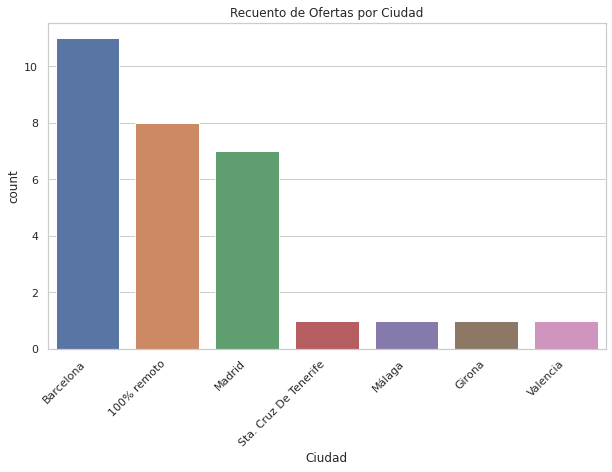

In [78]:
# Configura el estilo de seaborn
sns.set(style="whitegrid")

# Crea el gráfico de recuento de la columna "Ciudad"
plt.figure(figsize=(10, 6))
sns.countplot(x='Ciudad', data=df_ofertas, order=df_ofertas['Ciudad'].value_counts().index)
plt.xticks(rotation=45, ha='right')  # Ajusta la rotación de las etiquetas del eje x para mayor legibilidad
plt.title('Recuento de Ofertas por Ciudad')
plt.show()
